c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


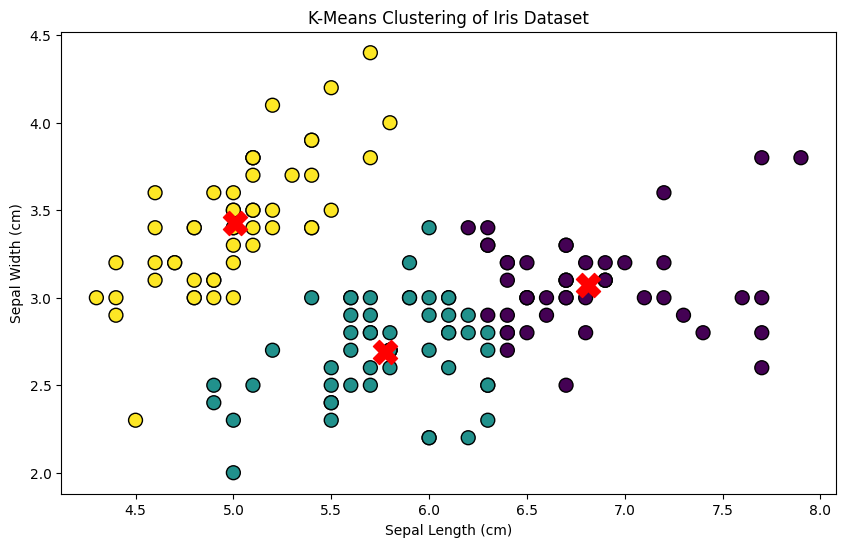

[[ 0  0 50]
 [12 38  0]
 [35 15  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.72      0.76      0.74        50
           2       0.00      0.00      0.00        50

    accuracy                           0.25       150
   macro avg       0.24      0.25      0.25       150
weighted avg       0.24      0.25      0.25       150



In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

X = data[['sepal length (cm)', 'sepal width (cm)']]
y = data['species']

kMeans = KMeans(n_clusters=3, random_state=42)
kMeans.fit(X)
clusters = kMeans.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

print(confusion_matrix(y, clusters))
print(classification_report(y, clusters))


Choosing the Optimal Number of Clusters
Task: Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. Visualize the Silhouette Score for different cluster counts.



c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-p

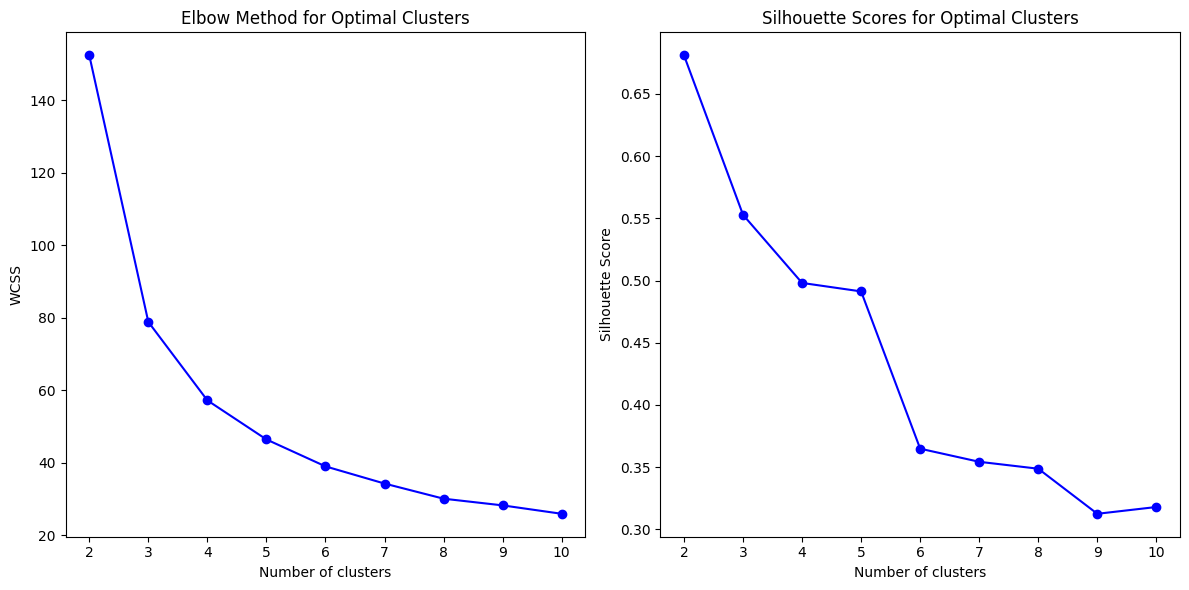

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data

rangeClusters = list(range(2, 11))

wcss = []
for n_clusters in rangeClusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

silhouetteScores = []
for n_clusters in rangeClusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouetteScores.append(silhouette_avg)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(rangeClusters, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')

plt.subplot(1, 2, 2)
plt.plot(rangeClusters, silhouetteScores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Clusters')

plt.tight_layout()
plt.show()


Cluster Visualization with PCA
Task: Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


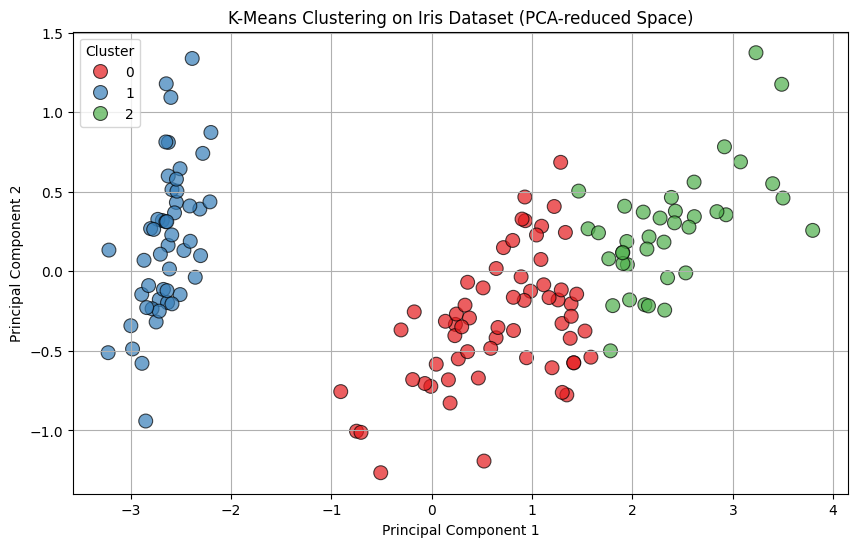

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

nClusters = 3  
kmeans = KMeans(n_clusters=nClusters, random_state=42)
clusterLabels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
XPca = pca.fit_transform(X)

dfPca = pd.DataFrame(XPca, columns=['PCA1', 'PCA2'])
dfPca['Cluster'] = clusterLabels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfPca, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.7, edgecolor='k')
plt.title('K-Means Clustering on Iris Dataset (PCA-reduced Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


Hierarchical Clustering: Dendrogram
Task: Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.



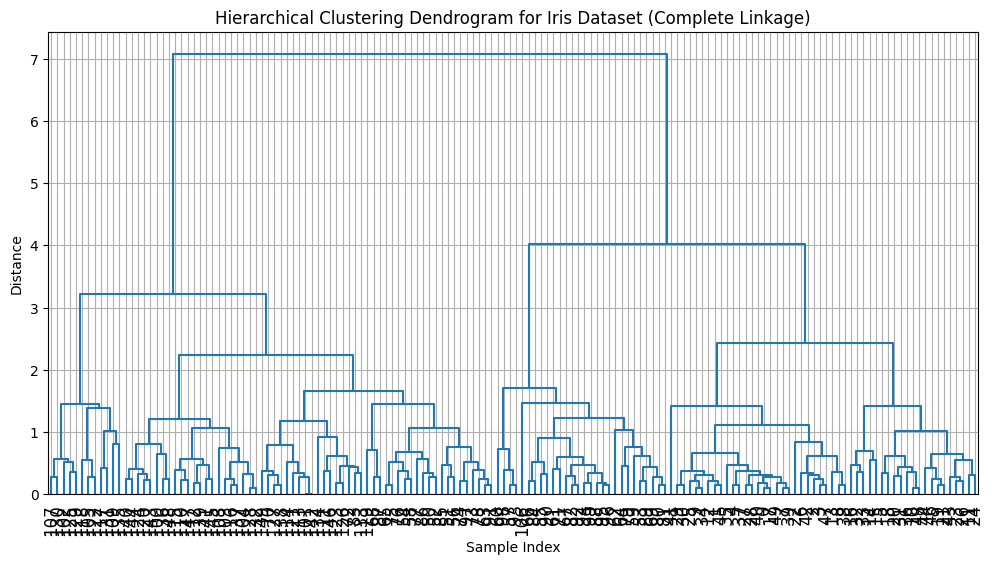

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

Z = linkage(X, method='complete')
plt.figure(figsize=(12, 6))
dendrogram(Z, 
           leaf_rotation=90,
           leaf_font_size=12,
           color_threshold=0)

plt.title('Hierarchical Clustering Dendrogram for Iris Dataset (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid()
plt.show()


Comparing Clustering Algorithms
Task: Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.



c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


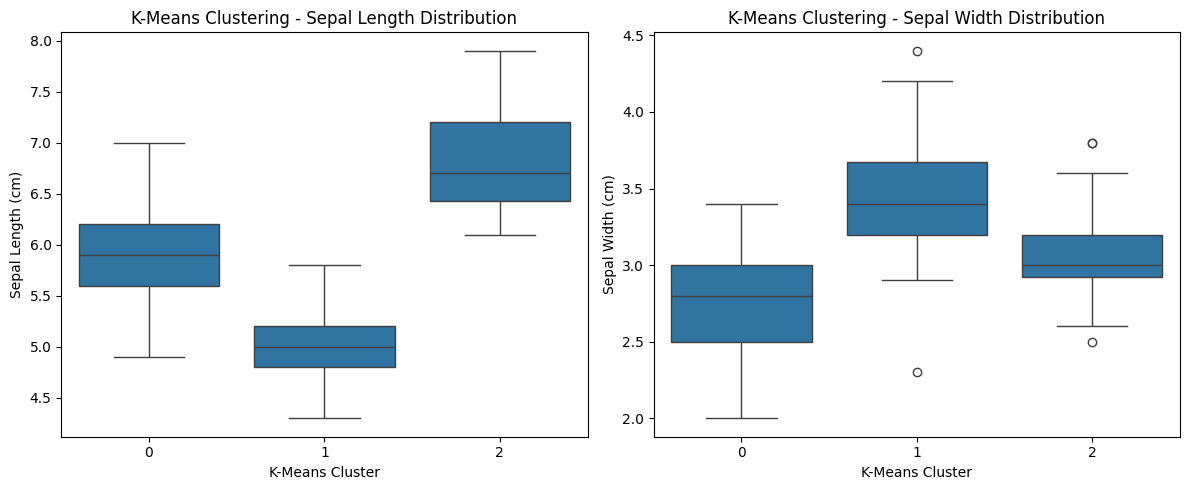

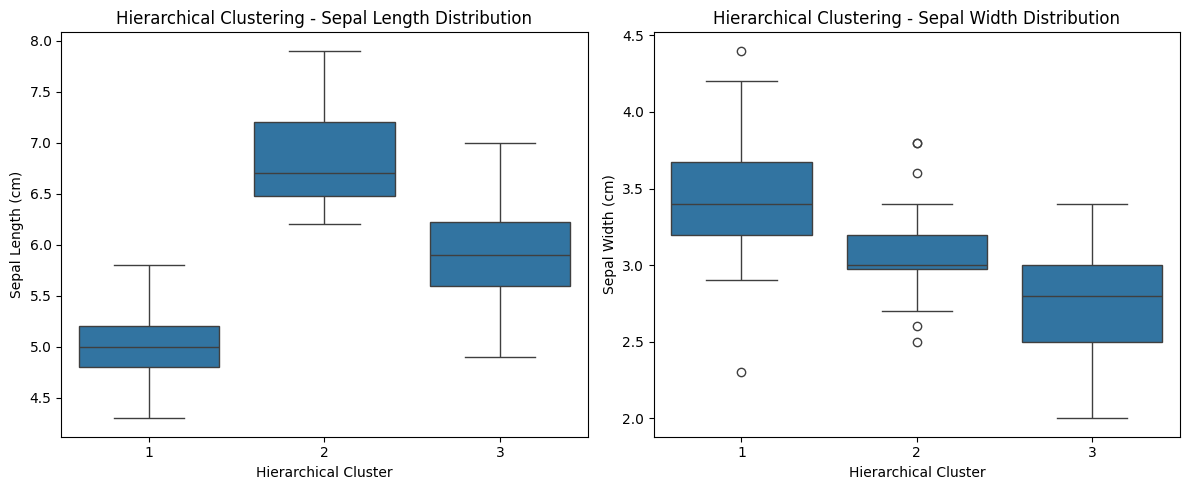

K-Means Silhouette Score: 0.5528190123564095
Hierarchical Silhouette Score: 0.5543236611296419


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster

iris = load_iris()
X = iris.data
featureNames = iris.feature_names

numClusters = 3
kmeans = KMeans(n_clusters=numClusters, random_state=42)
kmeansLabels = kmeans.fit_predict(X)
kmeansSilhouette = silhouette_score(X, kmeansLabels)

Z = linkage(X, method='ward')
hierarchicalLabels = fcluster(Z, t=numClusters, criterion='maxclust')
hierarchicalSilhouette = silhouette_score(X, hierarchicalLabels)

df = pd.DataFrame(X, columns=featureNames)
df['KMeans Cluster'] = kmeansLabels
df['Hierarchical Cluster'] = hierarchicalLabels

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='KMeans Cluster', y='sepal length (cm)')
plt.title('K-Means Clustering - Sepal Length Distribution')
plt.xlabel('K-Means Cluster')
plt.ylabel('Sepal Length (cm)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='KMeans Cluster', y='sepal width (cm)')
plt.title('K-Means Clustering - Sepal Width Distribution')
plt.xlabel('K-Means Cluster')
plt.ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Hierarchical Cluster', y='sepal length (cm)')
plt.title('Hierarchical Clustering - Sepal Length Distribution')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Sepal Length (cm)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Hierarchical Cluster', y='sepal width (cm)')
plt.title('Hierarchical Clustering - Sepal Width Distribution')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()

print("K-Means Silhouette Score:", kmeansSilhouette)
print("Hierarchical Silhouette Score:", hierarchicalSilhouette)
